# Logistic Regression Practice

![wine image from http://canadianclubofrome.blogspot.com/2017/02/ccr-wine-tasting-wines-from-le-marche.html](images/wine.jpg)

Data Source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

This wine data was gathered in 2009 from red and white variants of the Portuguese "Vinho Verde" wine.

In [1]:
# The most basic of imports
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/winequality-red-withtarget.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


## Business Understanding

We have a binary `target` column - each row is `1` if the wine is of great quality, and `0` if the wine is of normal/below average quality. "Great quality" is defined as having a 7+ wine quality score in the original data, from a column that has been removed in this csv.

So: what kind of problem is this?

- Classification!


Let's define a plausible business problem that this data could solve:

- Pricing  
- Relationship between great quality and factors of wine

**Confusion Matrix**  
False Negative: predicts an actually good quality wine is bad  
> - Outcome: Buy less wine - miss out on some good quality wines  

False Positive: predicts an actually bad quality wine is good  
> - Outcome: Buy bad wine

Related: which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models? 

- Accuracy
- **PRECISION** because it will help you minimize False Positives
- Recall
- F1-Score


## Data Exploration and Cleaning

What steps do we want to perform to explore our data, and do we need to do any cleaning of this data to avoid problems down the line?

- Scale data
- Correlation, check for multicollinearity
- Check the balance of the target 


In [8]:
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # New to version 0.22.2

In [21]:
df['target'].value_counts()

0    1382
1     217
Name: target, dtype: int64

In [19]:
df.corr()
abs(df.corr()) > 0.75

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,True,False,False,False,False,False
density,False,False,False,False,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


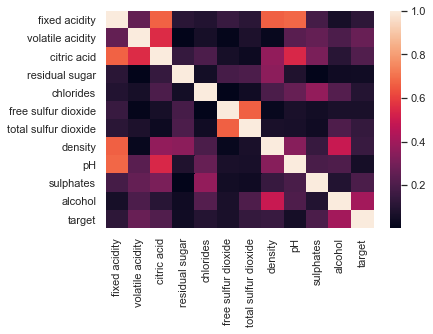

In [28]:
sns.heatmap(df.corr().abs())

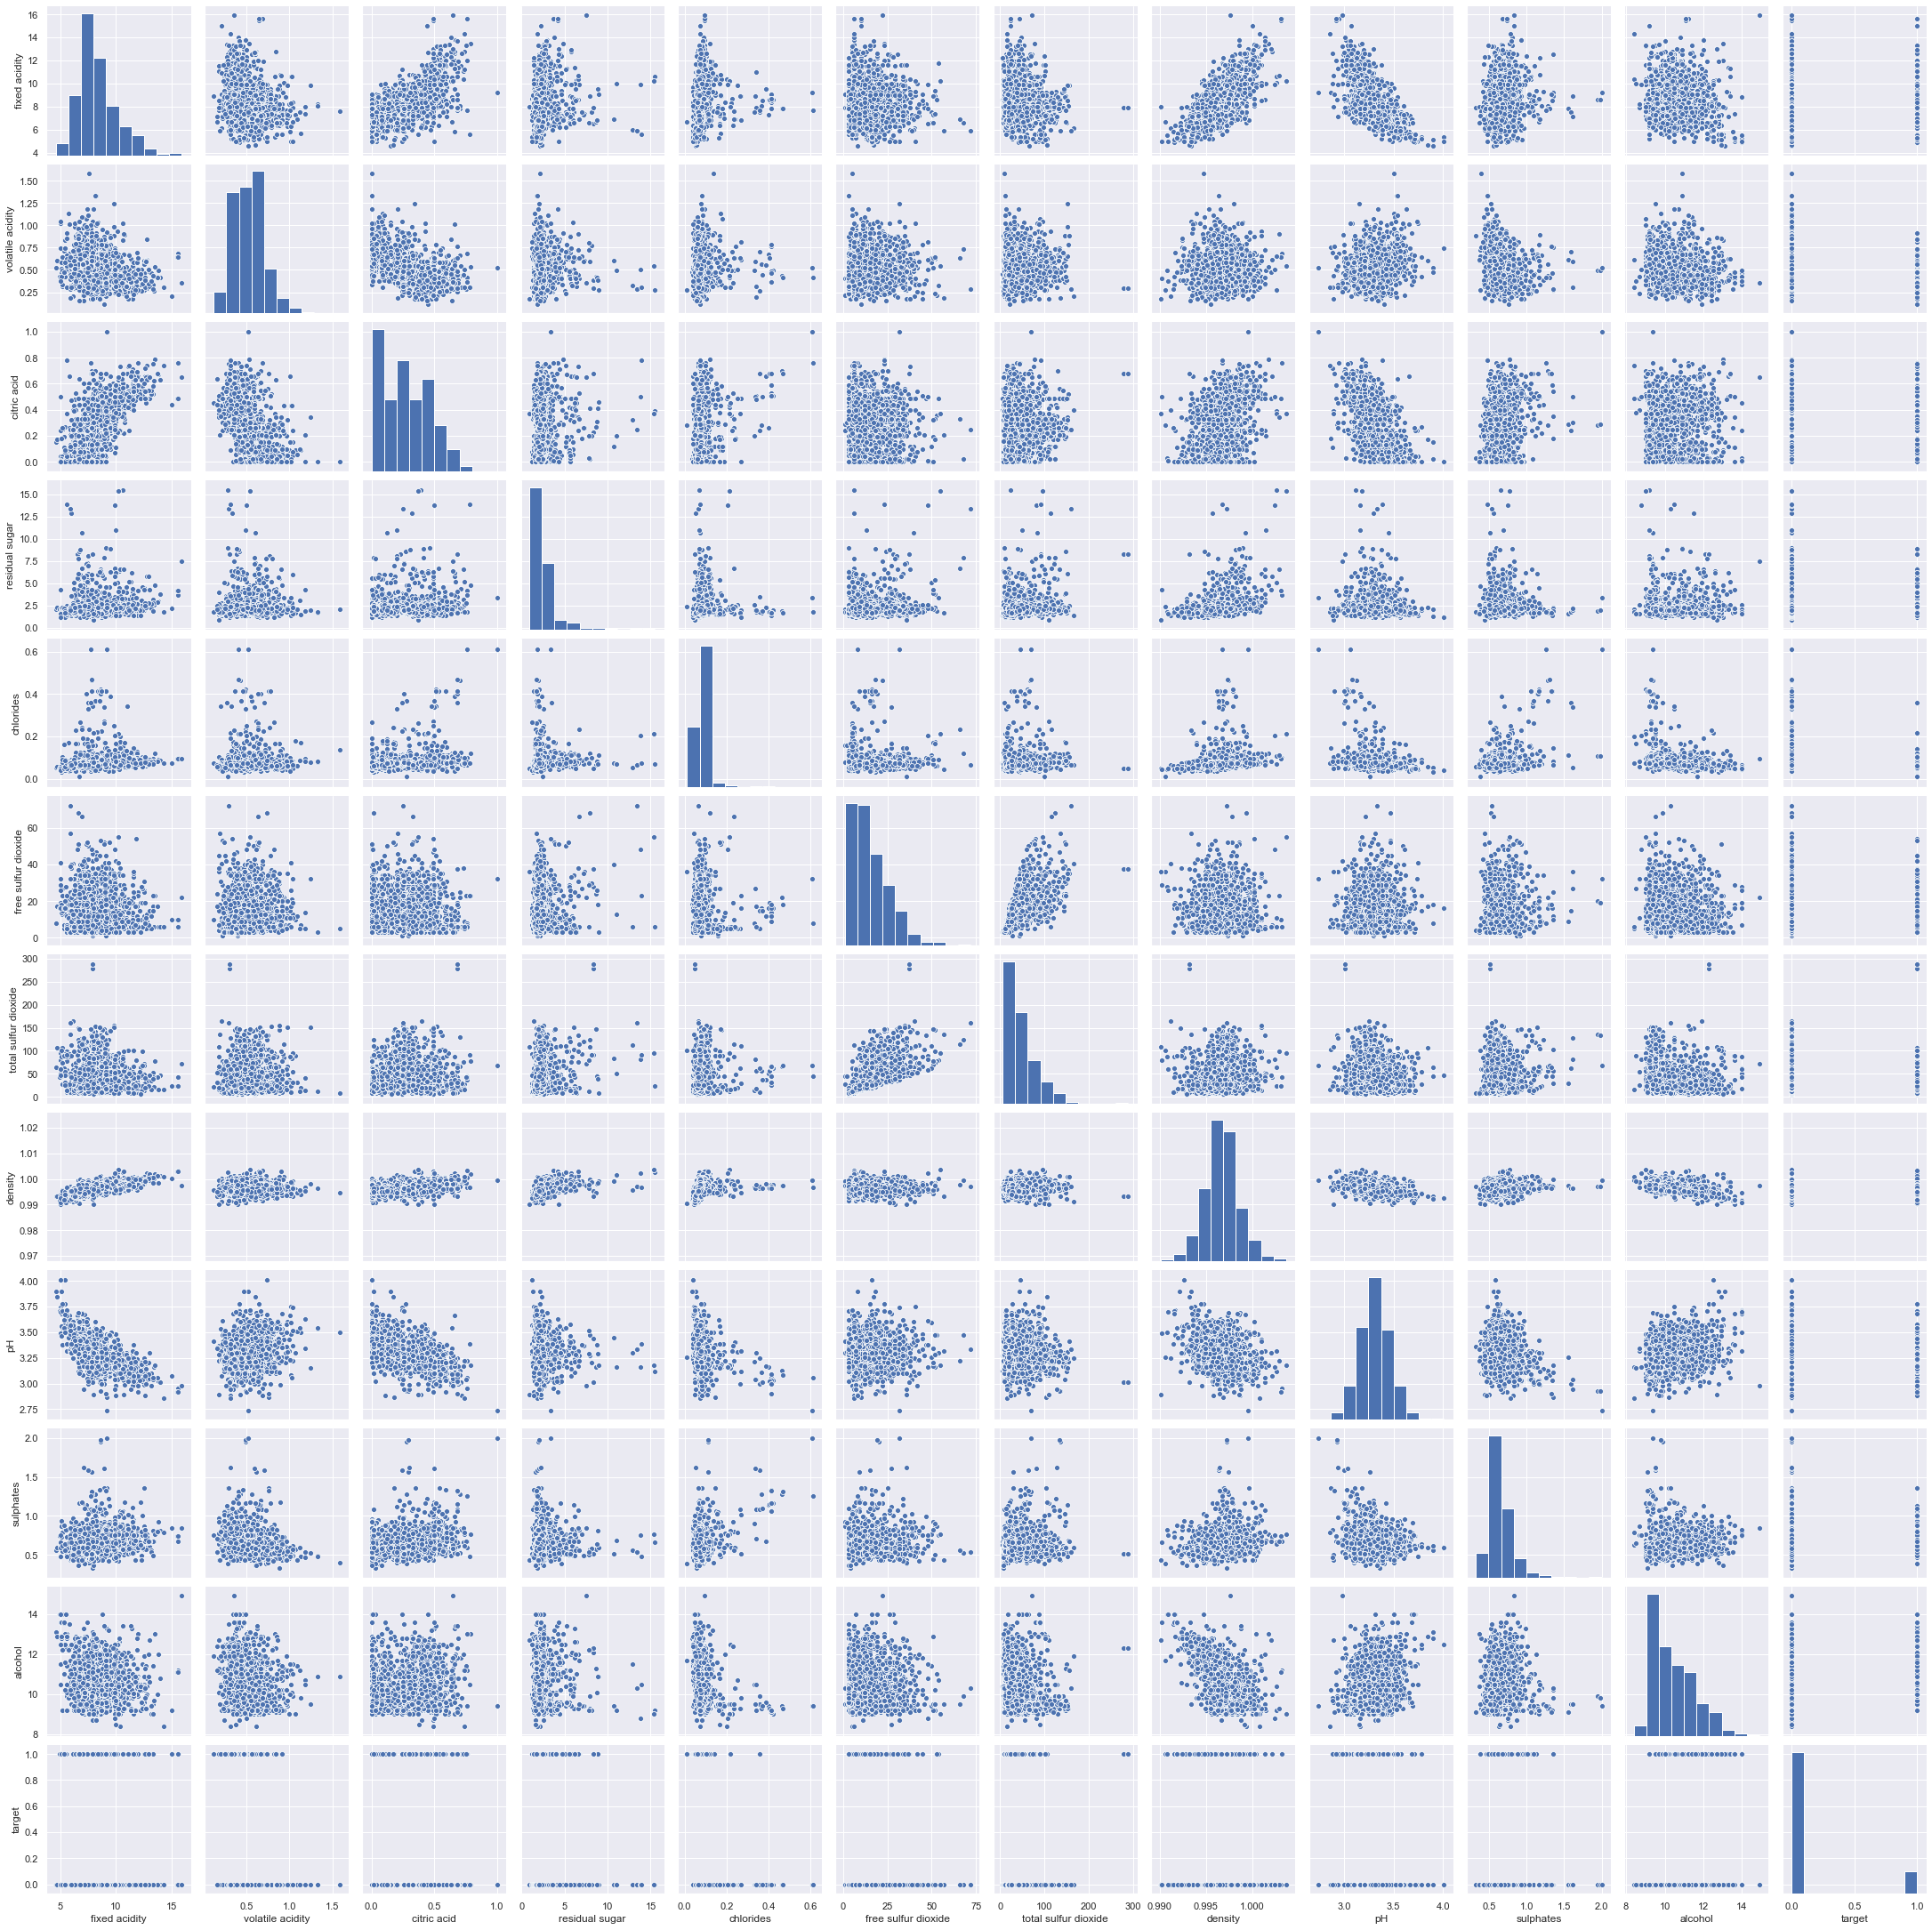

In [29]:
sns.pairplot(df)

## Modeling and Evaluation

Where do we want to start with modeling? What potential steps do we want to try to iterate through and potentially improve our model?

- Define X and y and perform a train-test split
- Scale / preprocess before modeling
    - Standard vs MinMax vs Robust
- Model
    - Model-less baseline
    - Log Regression
- Balance our target
    - Set class weight to balanced  
    - Over-sample minority class  
    - Under-sample our majority class  
    - Synthesize more minority data with 'SMOTE'
    



In [9]:
X = df.drop(columns=['target'], axis=1)
y =df.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [31]:
# Now, let's scale our data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*---*

In [40]:
#Model-less baseline
len(df.loc[df['target'] == 0]) / len(df)

0.8642901813633521

*---*

In [42]:
# Instantiate our model
logreg = LogisticRegression()

In [43]:
# Now, fitting our model and grabbing our training and testing predictions
logreg.fit(X_train_scaled, y_train)

train_preds = logreg.predict(X_train_scaled)
test_preds = logreg.predict(X_test_scaled)

In [44]:
confusion_matrix(y_test, test_preds)

array([[436,  15],
       [ 54,  23]])

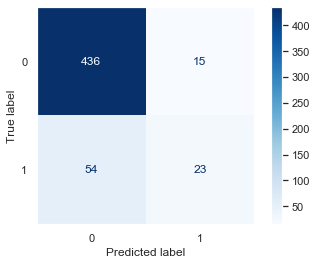

In [45]:
# Plotting the confusion matrix using SKLearn
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.grid(False) # This just removes an annoying grid that shows up by default

plt.show()

In [46]:
# Printing the metrics nicely
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, train_preds):.4f}")
    print(f"TEST: {metric(y_test, test_preds):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8880
TEST: 0.8693
***************
Recall:
TRAIN: 0.3071
TEST: 0.2987
***************
Precision:
TRAIN: 0.6515
TEST: 0.6053
***************
F1-Score:
TRAIN: 0.4175
TEST: 0.4000
***************


*-----*

In [48]:
# Instantiate our model
logreg = LogisticRegression(class_weight = 'balanced')

In [49]:
# Now, fitting our model and grabbing our training and testing predictions
logreg.fit(X_train_scaled, y_train)

train_preds = logreg.predict(X_train_scaled)
test_preds = logreg.predict(X_test_scaled)

In [50]:
confusion_matrix(y_test, test_preds)

array([[355,  96],
       [  8,  69]])

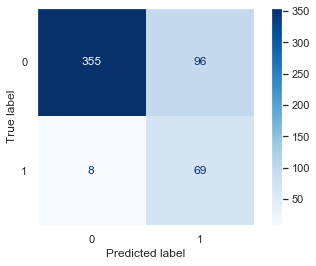

In [51]:
# Plotting the confusion matrix using SKLearn
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.grid(False) # This just removes an annoying grid that shows up by default

plt.show()

In [52]:
# Printing the metrics nicely
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric(y_train, train_preds):.4f}")
    print(f"TEST: {metric(y_test, test_preds):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.7824
TEST: 0.8030
***************
Recall:
TRAIN: 0.8071
TEST: 0.8961
***************
Precision:
TRAIN: 0.3542
TEST: 0.4182
***************
F1-Score:
TRAIN: 0.4924
TEST: 0.5702
***************


In [53]:
23/ (23 + 15)

0.6052631578947368

## Conclusion

How good was our final model? What can we learn from our model? What insights can we glean? 


